In [45]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [46]:
#data preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 43910 files belonging to 24 classes.


In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 14373 files belonging to 24 classes.


In [13]:
cnn = tf.keras.models.Sequential()

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [20]:
cnn.add(tf.keras.layers.Flatten())

In [21]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu')) 
batch_size=8

In [22]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [23]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=24,activation='softmax'))


In [24]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])


In [25]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,889,528 (11.02 MB)

 Trainable params: 2,889,528 (11.02 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)  

Epoch 1/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 1083s 783ms/step - accuracy: 0.3665 - loss: 2.1205 - val_accuracy: 0.6592 - val_loss: 1.6046
Epoch 2/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 1020s 743ms/step - accuracy: 0.8188 - loss: 0.5648 - val_accuracy: 0.7207 - val_loss: 1.3408
Epoch 3/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 998s 727ms/step - accuracy: 0.8987 - loss: 0.3199 - val_accuracy: 0.7333 - val_loss: 1.6926
Epoch 4/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 1035s 754ms/step - accuracy: 0.9316 - loss: 0.2151 - val_accuracy: 0.7453 - val_loss: 1.8871
Epoch 5/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 1285s 936ms/step - accuracy: 0.9466 - loss: 0.1638 - val_accuracy: 0.7495 - val_loss: 1.9394
Epoch 6/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 2904s 2s/step - accuracy: 0.9577 - loss: 0.1311 - val_accuracy: 0.7550 - val_loss: 1.9760
Epoch 7/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 1913s 1s/step - accuracy: 0.9684 - loss: 0.0963 - val_accuracy: 0.7418 - val_loss: 2.0671
Epoch 8/10
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 1324s 964ms/step - a

In [27]:
#Training set Accuracy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1373/1373 ━━━━━━━━━━━━━━━━━━━━ 375s 273ms/step - accuracy: 0.9910 - loss: 0.0281
Training accuracy: 0.9924846291542053


In [29]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

450/450 ━━━━━━━━━━━━━━━━━━━━ 109s 242ms/step - accuracy: 0.7572 - loss: 2.1997
Validation accuracy: 0.7595491409301758


In [30]:
cnn.save('trained_plant_disease_model.keras')

In [31]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5672056674957275,
  0.8470052480697632,
  0.9095878005027771,
  0.9363698363304138,
  0.9517650008201599,
  0.9606012105941772,
  0.9683898687362671,
  0.9718970656394958,
  0.9778182506561279,
  0.9794579744338989],
 'loss': [1.4140794277191162,
  0.47826430201530457,
  0.2848339080810547,
  0.2003621608018875,
  0.14969240128993988,
  0.12114332616329193,
  0.09611222892999649,
  0.08489862829446793,
  0.068064846098423,
  0.06203015521168709],
 'val_accuracy': [0.6592221260070801,
  0.7207263708114624,
  0.7333194017410278,
  0.7452862858772278,
  0.7495303750038147,
  0.7550267577171326,
  0.7418075799942017,
  0.7628887295722961,
  0.7617059946060181,
  0.7595491409301758],
 'val_loss': [1.604569435119629,
  1.340817928314209,
  1.6926472187042236,
  1.887145757675171,
  1.9394159317016602,
  1.9760353565216064,
  2.067106246948242,
  1.9652568101882935,
  2.0656518936157227,
  2.167585849761963]}

In [32]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [33]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


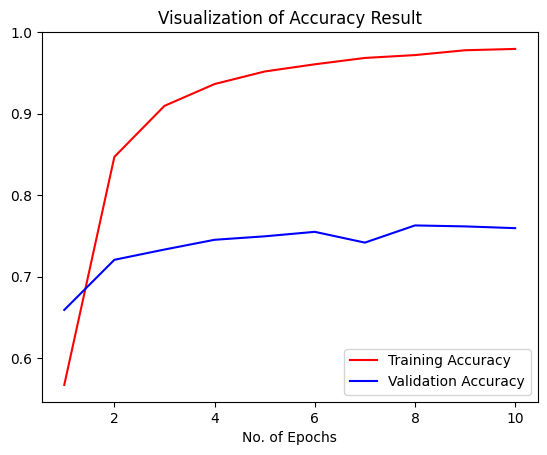

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [35]:
class_name = validation_set.class_names

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 14373 files belonging to 24 classes.


In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

14373/14373 ━━━━━━━━━━━━━━━━━━━━ 177s 12ms/step


In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
Y_true

<tf.Tensor: shape=(14373,), dtype=int64, numpy=array([ 0,  0,  0, ..., 23, 23, 23], dtype=int64)>

In [40]:
predicted_categories

<tf.Tensor: shape=(14373,), dtype=int64, numpy=array([ 0,  0,  0, ..., 23, 23, 23], dtype=int64)>

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [42]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.63      0.97      0.77       504
                                 Apple___Black_rot       0.97      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.63      0.99      0.77       440
                                   Apple___healthy       0.50      0.95      0.66       502
                               Blueberry___healthy       0.74      0.98      0.84       454
          Cherry_(including_sour)___Powdery_mildew       0.80      0.98      0.88       421
                 Cherry_(including_sour)___healthy       0.91      0.97      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.78      0.91      0.84       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.92      0.

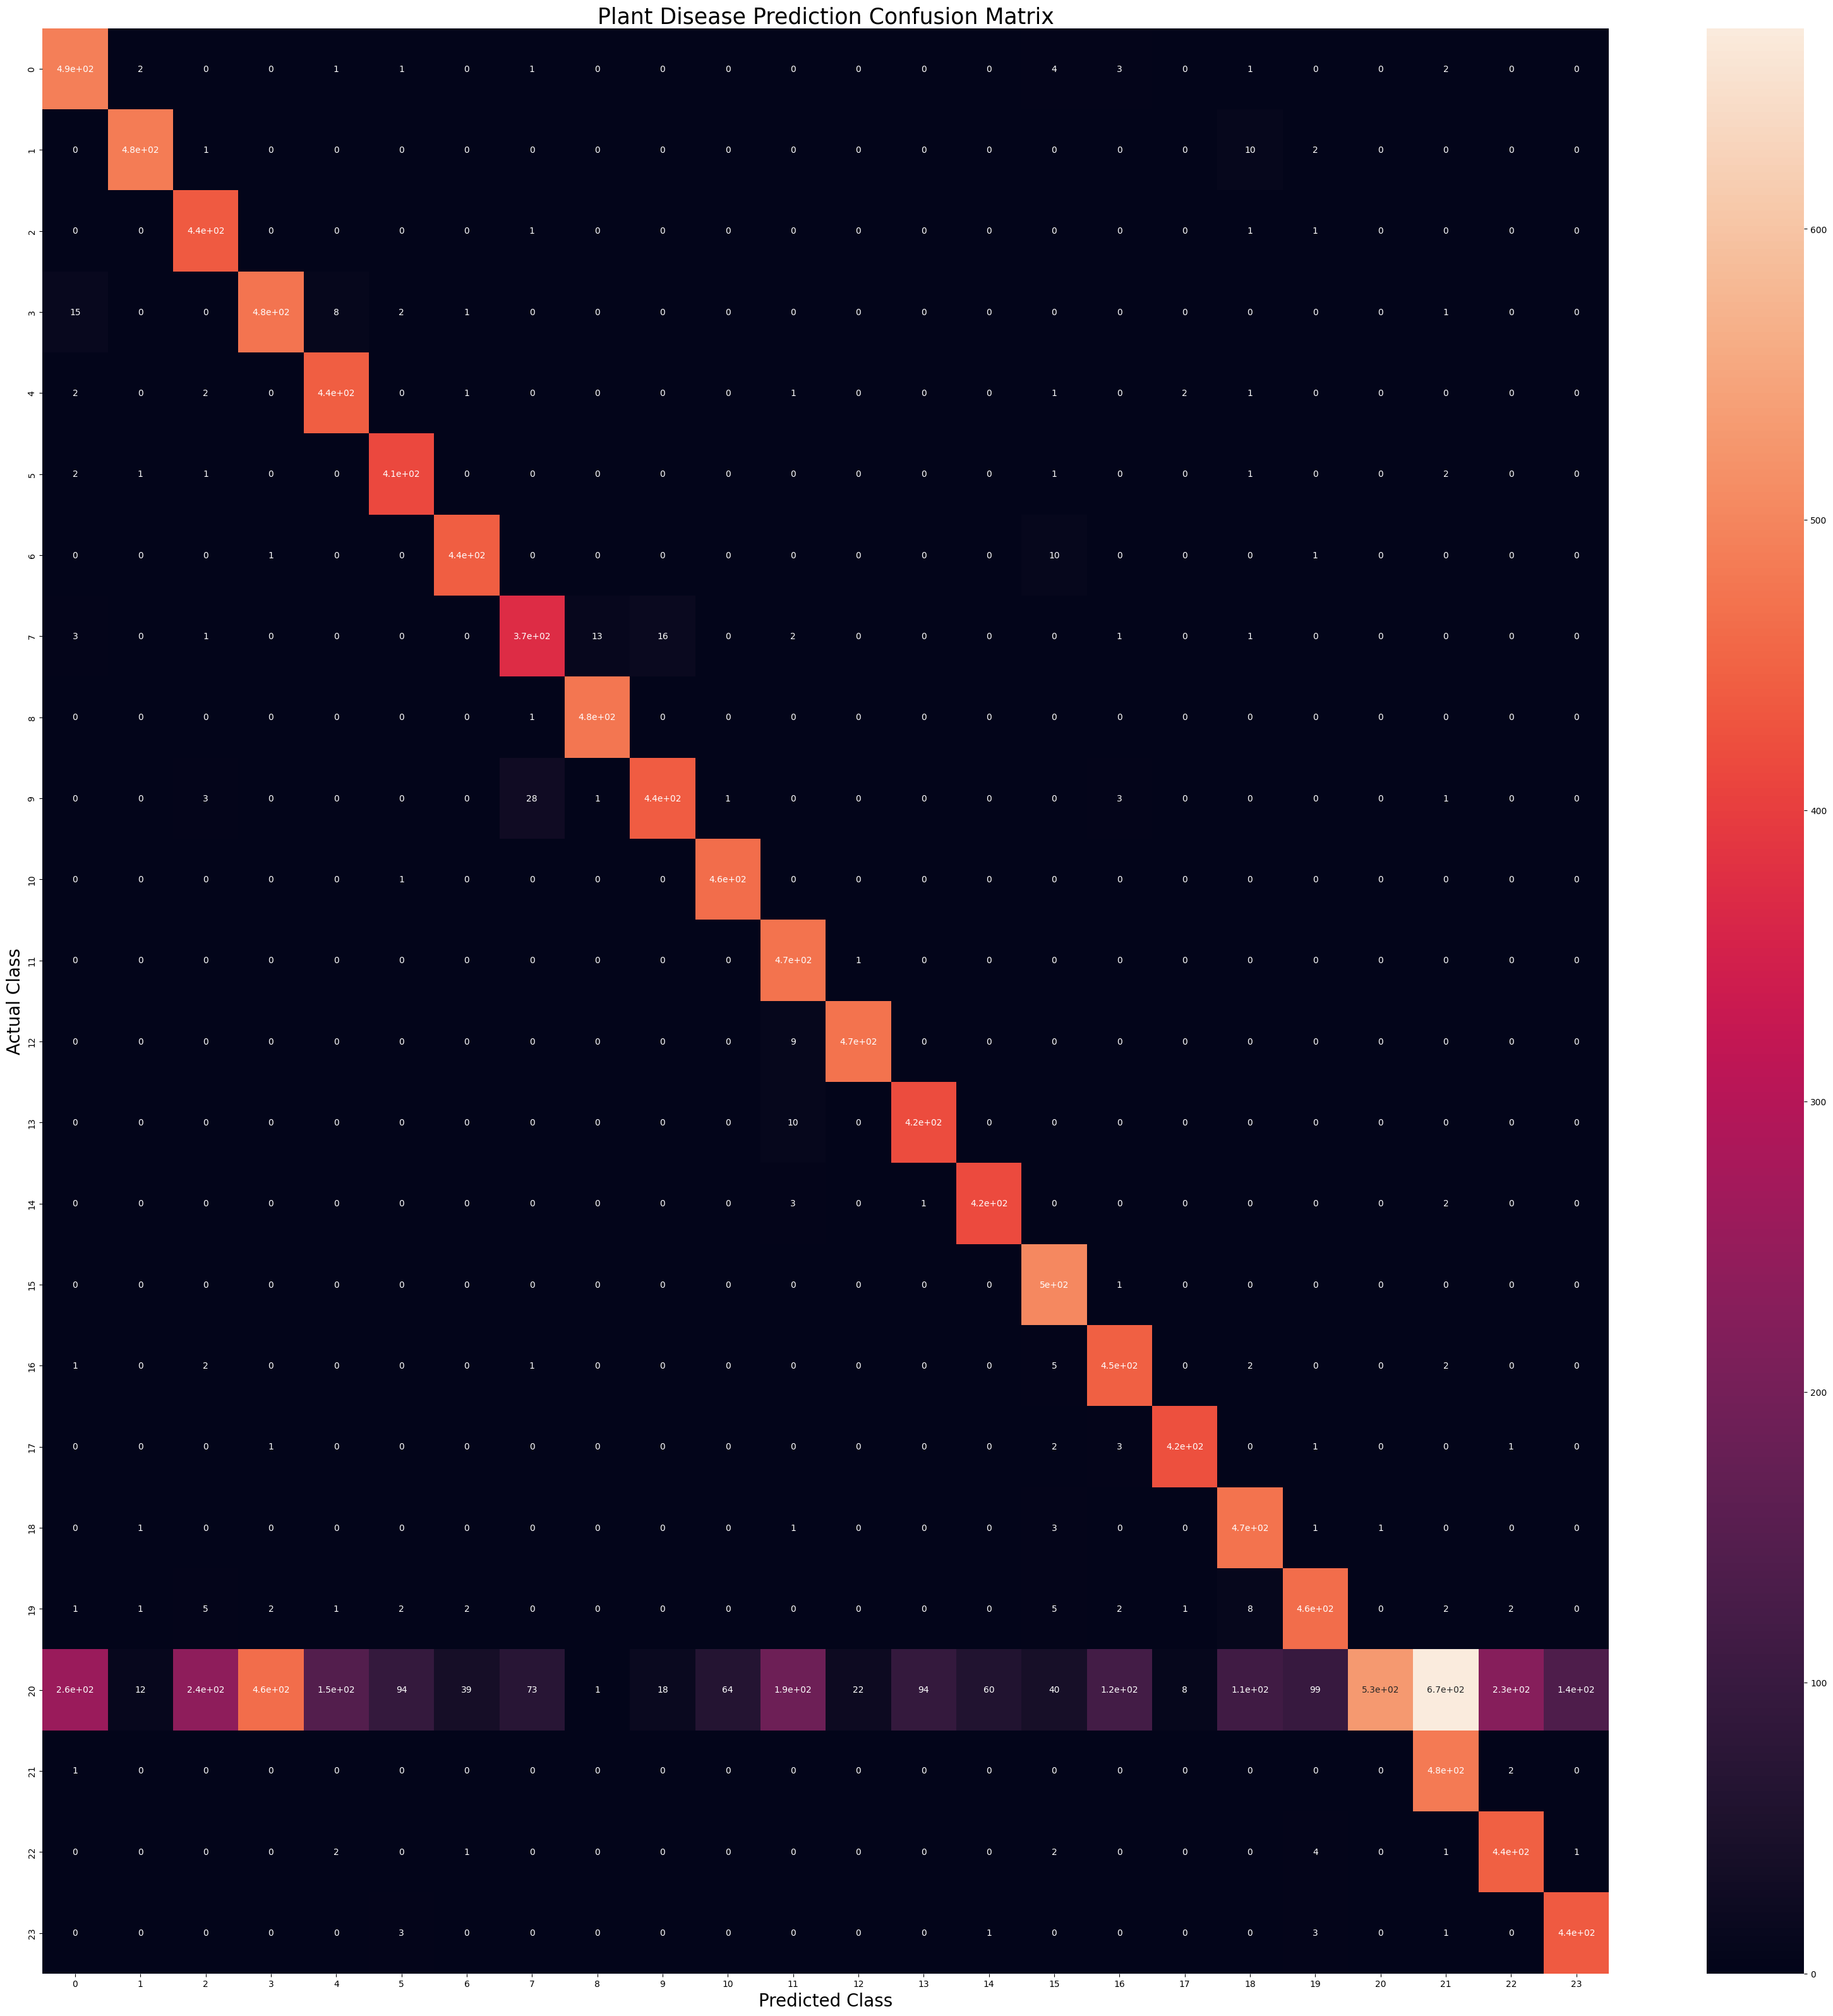

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

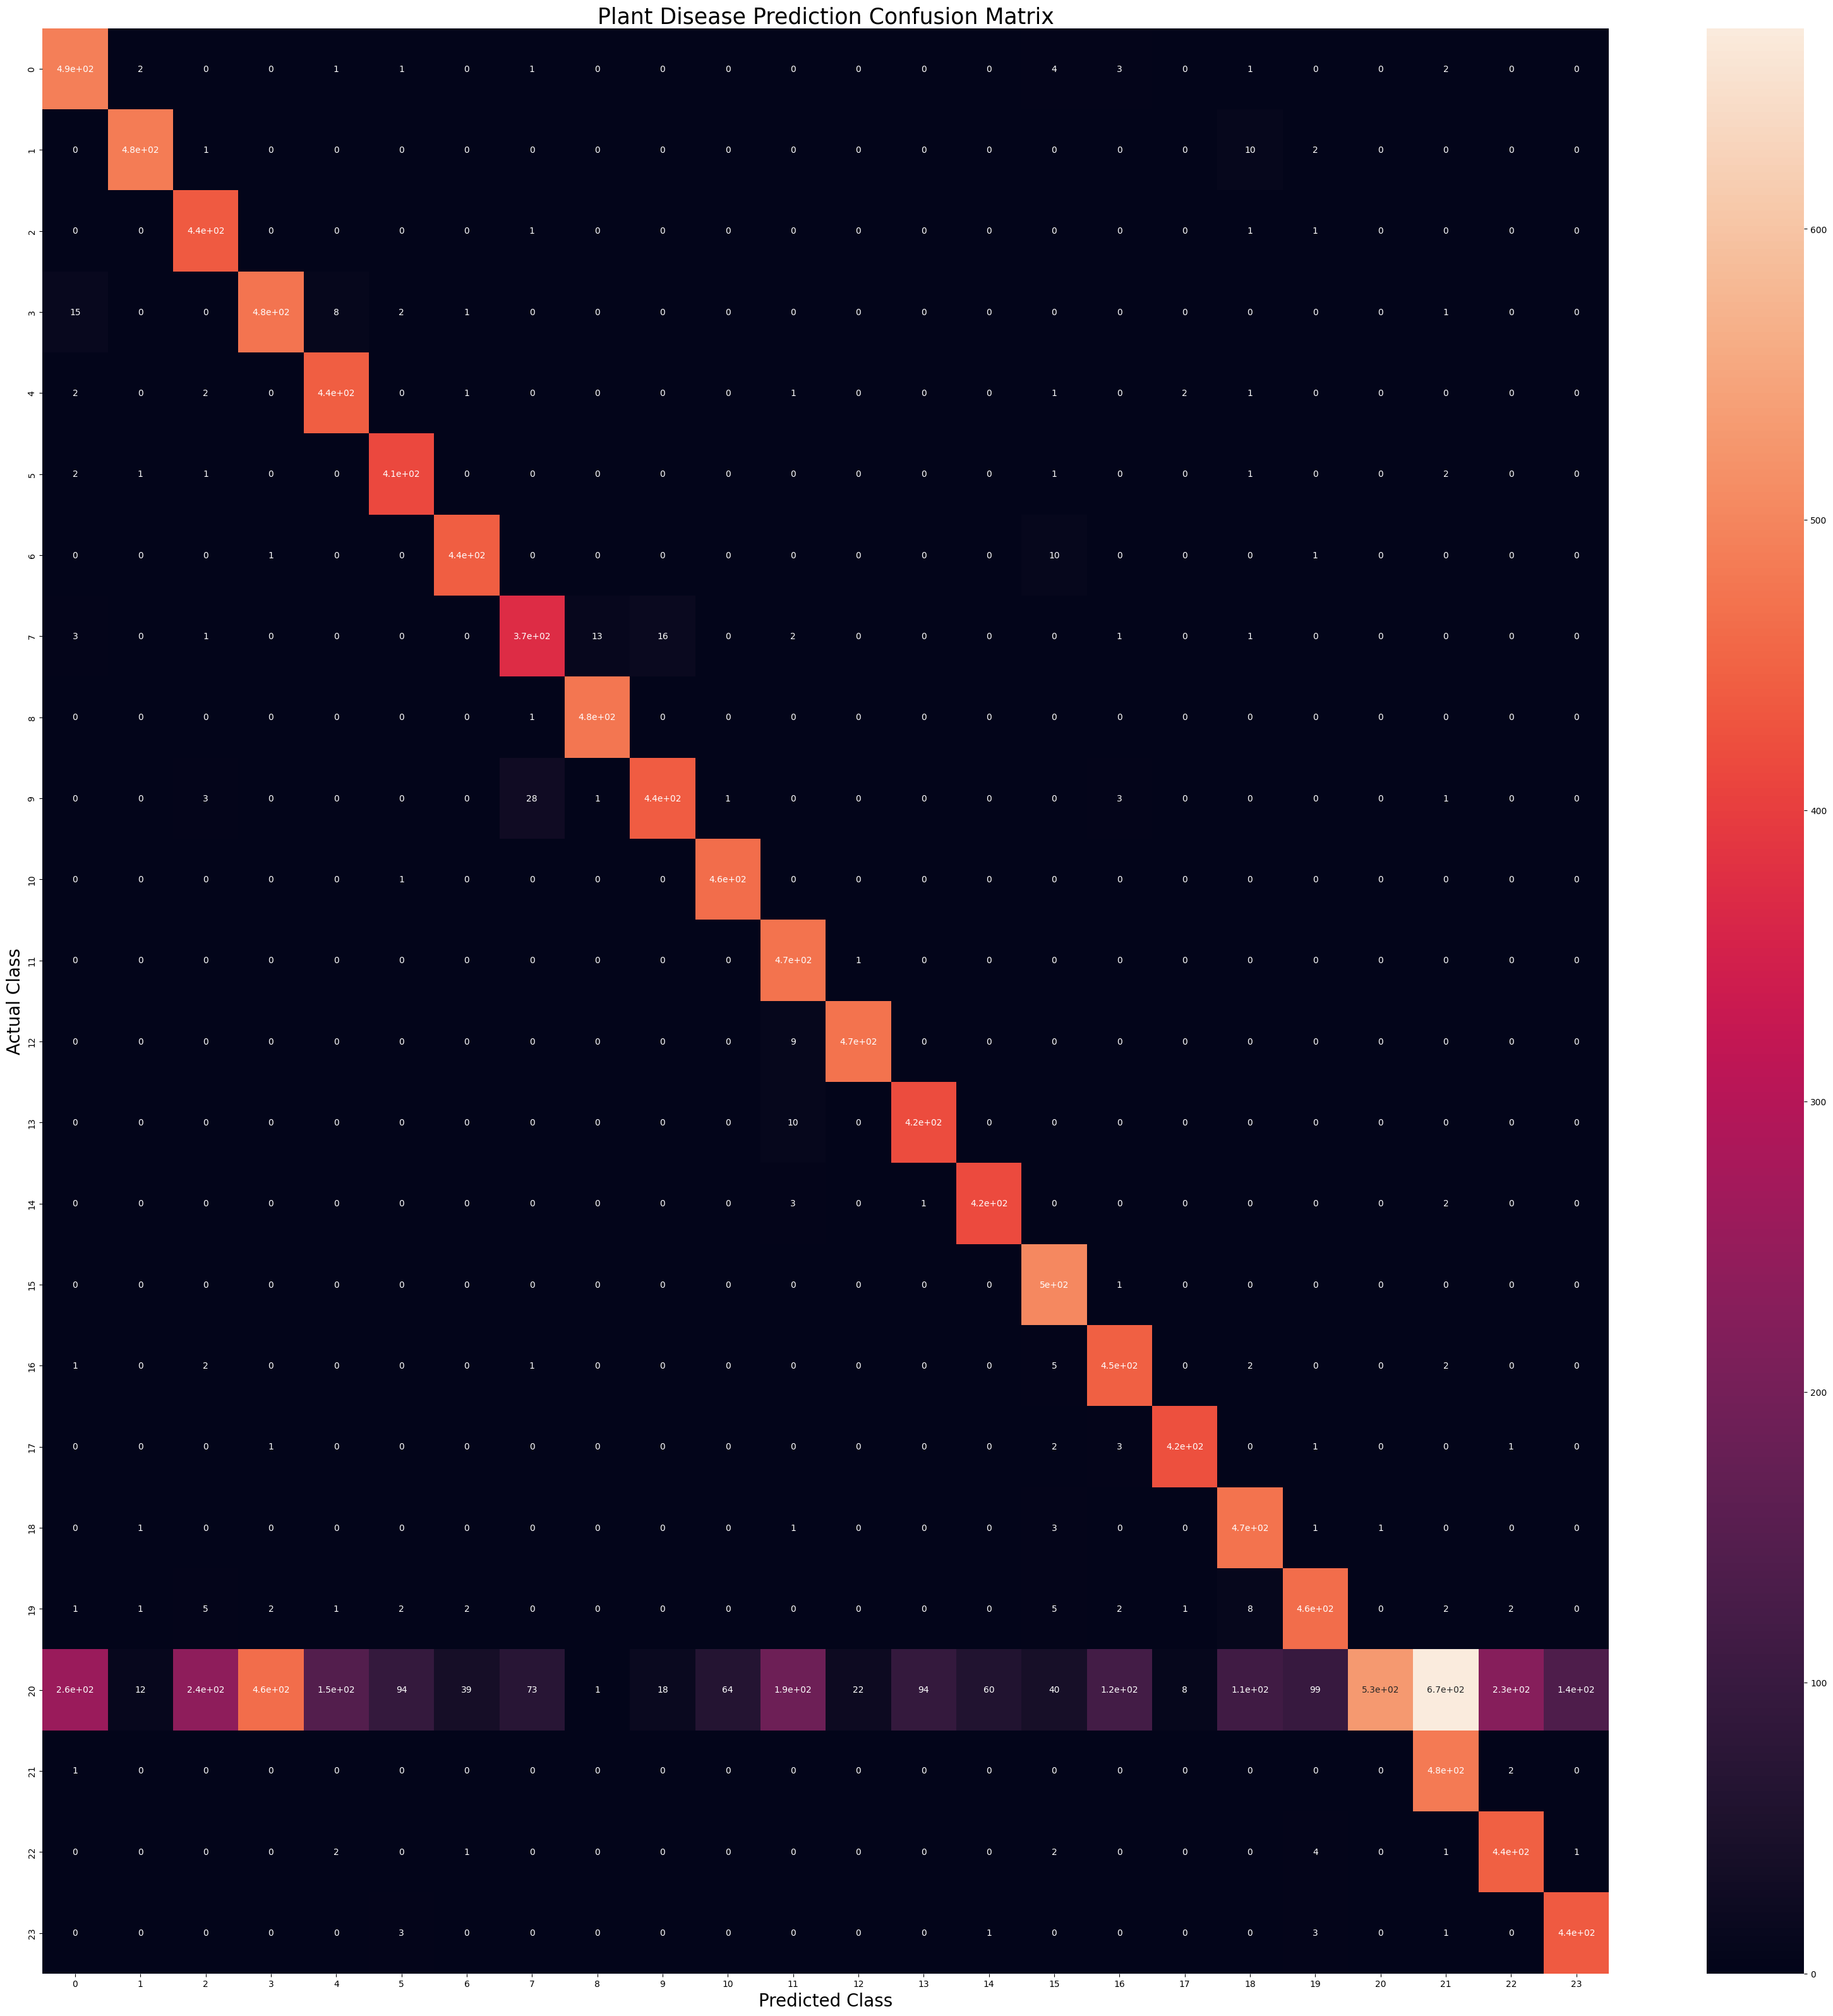

In [44]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()